<a href="https://colab.research.google.com/github/Manojpatil123/self-project/blob/main/Internship_Test_Part_2_Machine_Learning_Hackathon(manoj_patil_m)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading data set
df=pd.read_csv("data_2_var.csv")
df.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [ ]:
# EDA of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   -122.7406674  1110 non-null   float64
 1   -130.5720846  1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [ ]:
#in our data set 2 features are present and both are numeriacl type

In [ ]:
df.shape

(1110, 2)

In [ ]:
#checking duplicates
len(df[df.duplicated()])

21

In [ ]:
#we have 21 rows as duplicates we need to remove those duplicates
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.shape

(1089, 2)

In [ ]:
#checking describe of the data
df.describe()

,-122.7406674,-130.5720846
count,1089.000000,1089.000000
mean,8.236348,-27.288873
std,78.705379,68.331670
min,-134.962839,-132.422167
25%,-50.899870,-76.977190
50%,17.633331,-46.269792
75%,76.494608,5.150802
max,134.605775,134.425495


In [ ]:
#renaming column
df.columns=["input","output"]

In [ ]:
df.head()

,input,output
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [ ]:
df.columns

Index(['input', 'output'], dtype='object')

Text(0.5, 0, 'output')

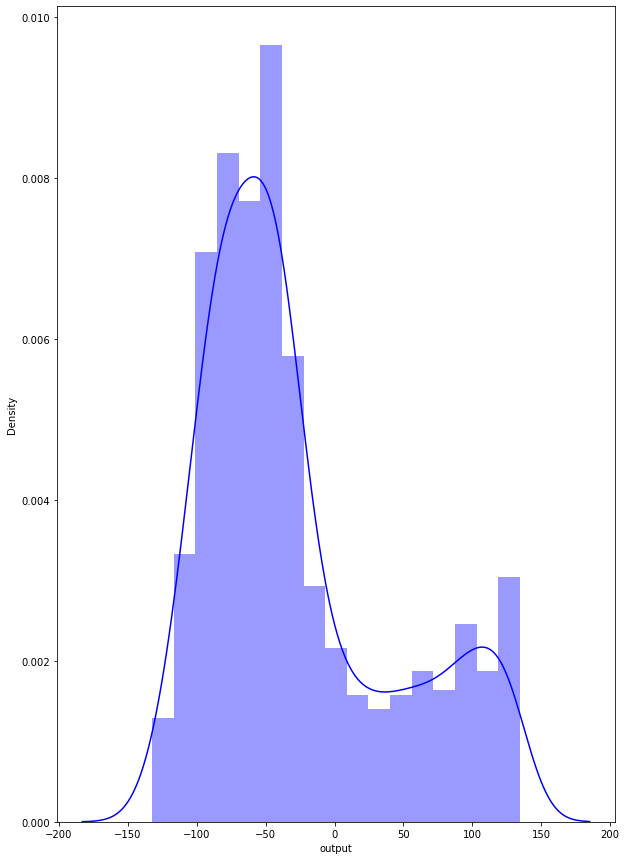

In [ ]:
#analysis of data 
plt.figure(figsize=(10,15))
sns.distplot((df['output']),color='b')
plt.xlabel('output')

In [ ]:
#its normal distributed and our model is bimodel becouse its having 2 modes

Text(0.5, 0, 'input')

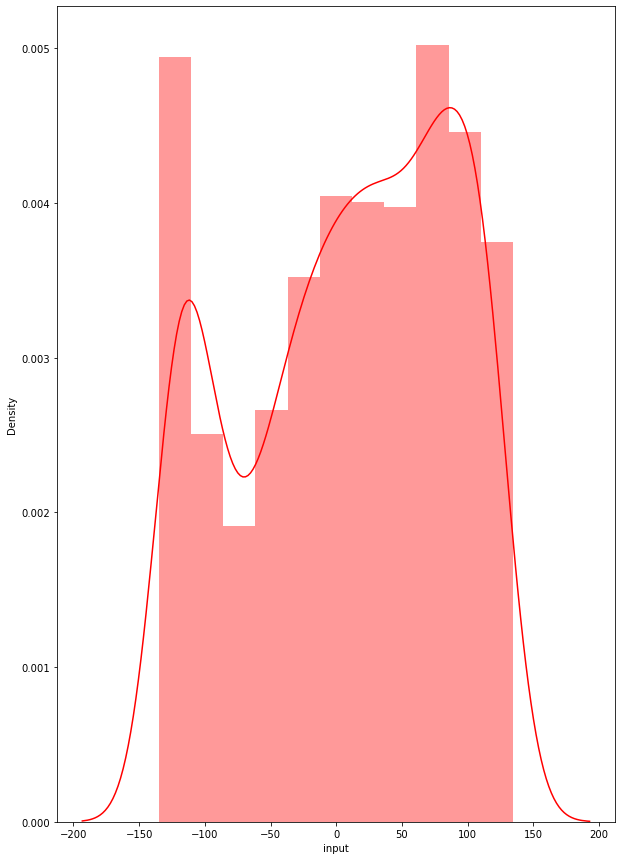

In [ ]:
plt.figure(figsize=(10,15))
sns.distplot((df['input']),color='r')
plt.xlabel('input')

In [ ]:
#input feature is also normaly distributed

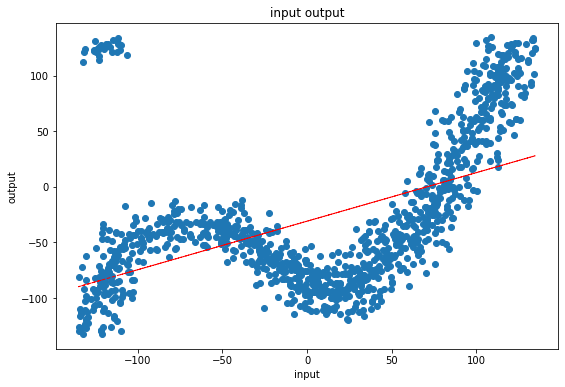

In [ ]:
#checking correlation
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
plt.scatter(df.input,df.output)
plt.xlabel("input")
plt.ylabel('output')
ax.set_title('input ' +"output" )
z = np.polyfit(df.input, df.output, 1)
y_hat = np.poly1d(z)(df.input)
 
plt.plot(df.input, y_hat, "r--", lw=1)
 
plt.show()

In [ ]:
#feature engineering 

In [ ]:
#checking nu;ll values 
df.isnull()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1104,False,False
1106,False,False
1107,False,False
1108,False,False


In [ ]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [ ]:
#in our data set there is no null values

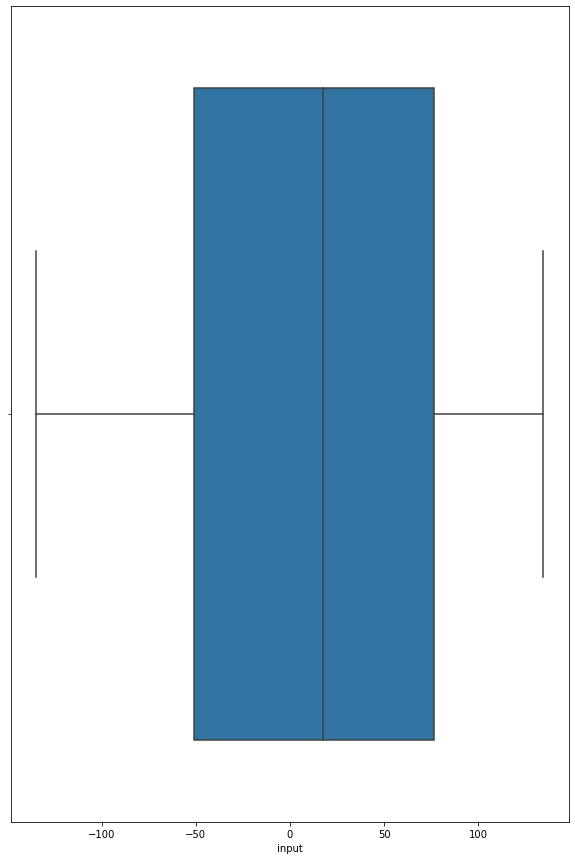

In [ ]:
#checking outliers in our dataset
plt.figure(figsize=(10,15))
sns.boxplot(df.input)
plt.show()

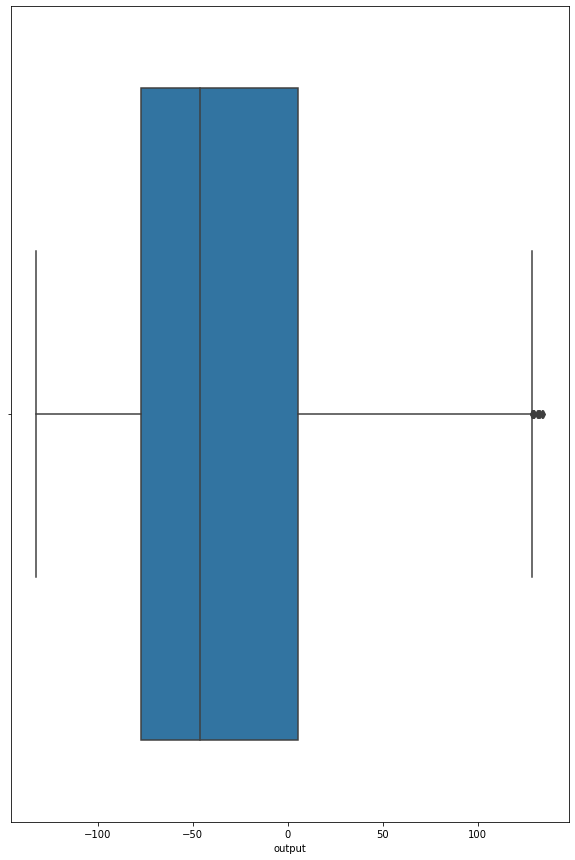

In [ ]:
#checking outliers in our dataset
plt.figure(figsize=(10,15))
sns.boxplot(df.output)
plt.show()

In [ ]:
#some outliers present in output column need to remove that
#using IQR method we can remove outliers

In [ ]:
percentile_q1 = np.percentile(df['output'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['output'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['output'],75)
print(percentile_q3)

-76.9771902
-46.26979181
5.150801609


In [ ]:
#iqr range
iq_range =  percentile_q3 - percentile_q1
iq_range

82.127991809

In [ ]:
#upper and lower limit
upper=percentile_q3+1.5*iq_range
lower=percentile_q1-1.5*iq_range
print(upper,lower)

128.3427893225 -200.1691779135


In [ ]:
df=df[(df['output']<upper)]

In [ ]:
#checking shape after removing outliers
df.shape

(1073, 2)

<Figure size 1440x720 with 0 Axes>

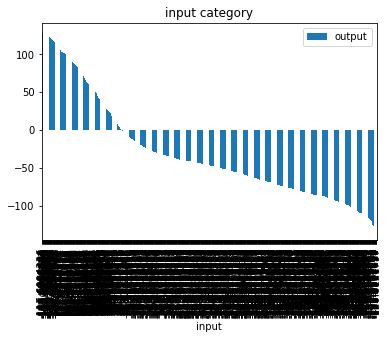

In [ ]:
#output have 2 modes creating one more feature for category each mode
plt.figure(figsize=(20, 10))

df1 = pd.DataFrame(df.groupby(['input'])['output'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('input category')
plt.show()

In [ ]:
df1.head()

,output
input,
-117.609424,128.249695
-111.515368,128.170885
117.756802,127.574391
-121.687849,127.444778
-109.942155,127.197394


In [ ]:
#renaming feature
df1.rename(columns={'output':'output_category'},inplace=True)

In [ ]:
#combining both dataframe
df = df.merge(df1,on = 'input',how = 'left')

In [ ]:
df.head()

,input,output,output_category
0,-121.531419,-129.938929,-129.938929
1,-134.917019,-130.141832,-130.141832
2,-120.605951,-125.760932,-125.760932
3,-129.894781,-112.785214,-112.785214
4,-134.366669,-116.000000,-116.000000


In [ ]:
#creating category
df['output_category'] = df['output_category'].apply(lambda x : 0 if x < 0 else 1)

In [ ]:
df.head()

,input,output,output_category
0,-121.531419,-129.938929,0
1,-134.917019,-130.141832,0
2,-120.605951,-125.760932,0
3,-129.894781,-112.785214,0
4,-134.366669,-116.000000,0


<AxesSubplot:>

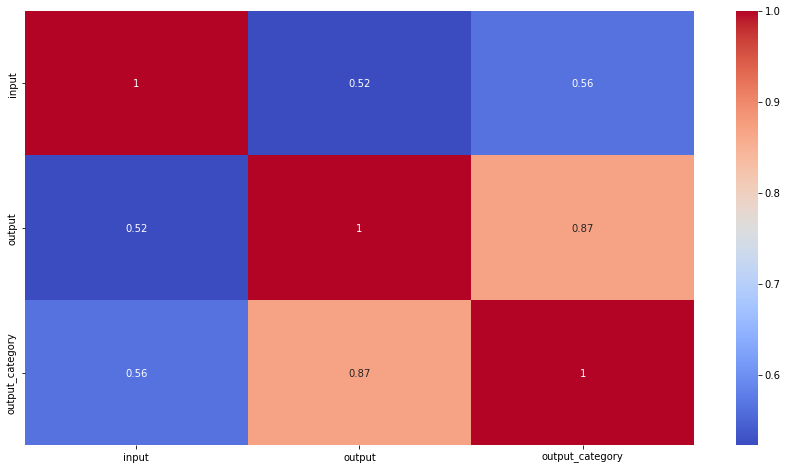

In [ ]:
#checking correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [ ]:
# there is no multi collinearity between indeoendent variable

In [ ]:
#spliting data to x and y
X=df[['input','output_category']]
Y=df['output']

In [ ]:
X.shape

(1073, 2)

In [ ]:
Y.shape

(1073,)

In [ ]:
#splitting test and train
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.2, random_state = 5) 
print(X_train.shape)
print(X_test.shape)

(858, 2)
(215, 2)


In [ ]:
#using logistic rgression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#train score
regressor.score(X_train, y_train)

0.7498282837841577

In [ ]:
regressor.coef_

array([6.07129141e-02, 1.22711069e+02])

In [ ]:
#prediction
y_pred = regressor.predict(X_train)
y_pred_l = regressor.predict(X_test)

In [ ]:
#implemention linear regression metrix test
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1260.727395552564
RMSE : 35.50672324437393
R2 : 0.7691809631840703
Adjusted R2 :  0.767003425100901


In [ ]:
#implemention linear regression metrix train
MSE  = mean_squared_error((y_train), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_train),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 1016.882967660999
RMSE : 31.888602472686053
R2 : 0.7498282837841577
Adjusted R2 :  0.7492430867871616


In [ ]:
#r2 of both test and train equal so there is no overfiiting and underfitting

In [ ]:
#using regularized regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7498282817077705

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)


MSE : 1260.795934656361
RMSE : 35.507688387958474
R2 : 0.7691684147695769


In [ ]:
#croos valodation and hyper parameter tuneing
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -1026.1234461668203


In [ ]:
y_pred_l = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 1260.7273955525652
RMSE : 35.50672324437395
R2 : 0.76918096318407
Adjusted R2 :  0.7492430867871616


In [ ]:
# after doing croos validation having same accuracy

In [ ]:
# try ploynomial regression model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_pred = lin2.predict(X_poly)
y_pred1 = lin2.predict(X_poly_test)

In [ ]:
#implemention linear regression metrix train
MSE  = mean_squared_error((y_train), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_train),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred)))*((X_poly.shape[0]-1)/(X_poly.shape[0]-X_poly.shape[1]-1)))

MSE : 443.45108473725907
RMSE : 21.058278294705364
R2 : 0.8909029628240552
Adjusted R2 :  0.8889594289076191


In [ ]:
#implemention linear regression metrix test
MSE  = mean_squared_error((y_test), (y_pred1))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred1))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred1)))*((X_poly_test.shape[0]-1)/(X_poly_test.shape[0]-X_poly_test.shape[1]-1)))

MSE : 621.4580421656677
RMSE : 24.929060194192395
R2 : 0.8862209648015758
Adjusted R2 :  0.8776446556157649


In [ ]:
#r2 is increse in plynomial regression 

In [ ]:
#using decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor( max_leaf_nodes=5, random_state=0)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=0)

In [ ]:
tree1.score(X_train, y_train)

0.8284631054673293

In [ ]:
y_predicted = tree1.predict(X_test)
y_train_pred=tree1.predict(X_train)

In [ ]:
MSE  = mean_squared_error((y_train), (y_train_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_train), (y_train_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_train), (y_train_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 697.2528670077046
MAE : 21.43917601630848
RMSE : 26.40554614106106
R2 : 0.8284631054673293
Adjusted R2 :  0.8280618495736856


In [ ]:
MSE  = mean_squared_error((y_test), (y_predicted))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_predicted))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test), (y_predicted))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predicted)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 902.3114276262498
MAE : 22.312484447235367
RMSE : 30.038499090770994
R2 : 0.8348011986037517
Adjusted R2 :  0.8332427193452965


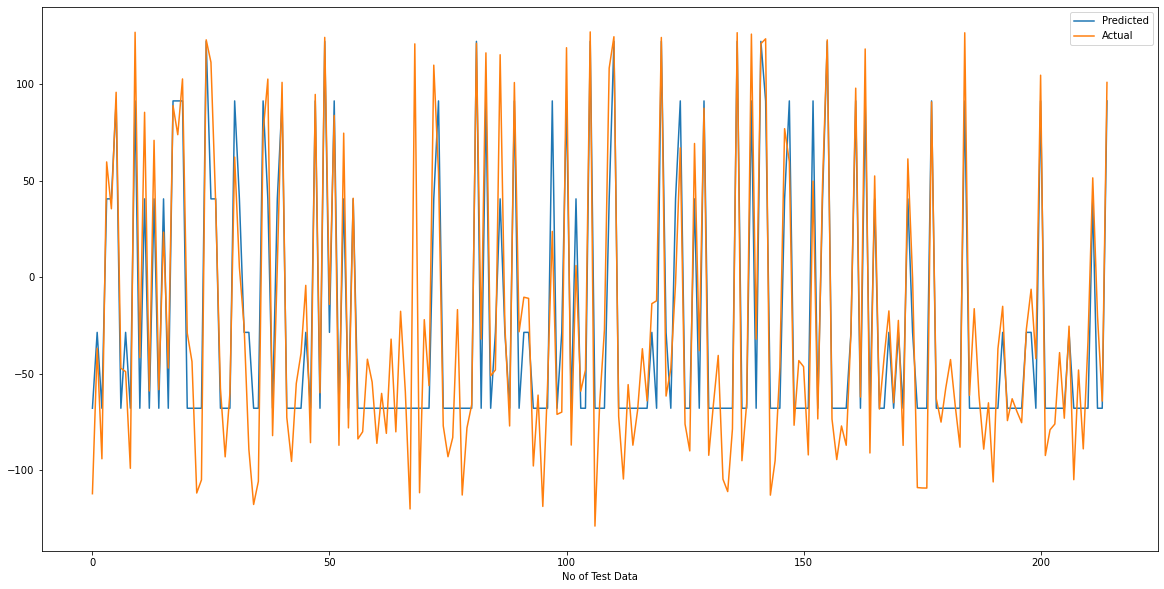

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((y_predicted))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
#decision tree give less r2 compare ploynomial regreesion

In [ ]:
#cross validation on decision tree
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
parameters = {"criterion":["squared_error","absolute_error",'friedman_mse','poisson'],"max_features":['auto', 'sqrt', 'log2'],"splitter":['best','random'],'max_leaf_nodes':[7,8,9,10,11,12,15],'max_depth':[2,3,4,5]}
tree1 = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=4)
tree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [7, 8, 9, 10, 11, 12, 15],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,tree1.best_params_)
print("\nUsing ",tree1.best_params_, " the negative mean squared error is: ", tree1.best_score_)

The best fit alpha value is found out to be : {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 12, 'splitter': 'best'}

Using  {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 12, 'splitter': 'best'}  the negative mean squared error is:  -481.38093855690835


In [ ]:
y_predicted = tree1.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_predicted))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_predicted))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score((y_test), (y_predicted))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_predicted)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 687.9730897959664
MAE : 17.02817585665093
RMSE : 26.22924112123655
R2 : 0.8740431226431906
Adjusted R2 :  0.8728548502152962


In [ ]:
#comparing all three model linear regression, polynomial regression and decision tree polynomial regression has higer test and train r2 value 
#has best fit no overfitting and underfitting we can canlude ployinomial regression is best model for our data set